In [1]:
import networkx as nx
from os.path import basename
from add_weights_rf import add_weights_rf
import matplotlib.pyplot as plt
%matplotlib inline

def get_graph(filestart):
    global num,ext
# Get next file in series
    ext = '%.5d' % num
    filename = filestart + ext + '.graphml'
    try:
        open(filename)
    except IOError as e:
        pass      
    G = nx.read_graphml(filename)
    num = num + 1
#
    G = add_weights_rf(G,threshold=0.6)
    return G

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
num = 0  # This is the number of graphml to start analysis on
end = 500 # This is the number to end analytics e,g., 500 would be 500 time series of graphmls.

filestart = "scenarios/JavaScenario/output_fadingModelRedo/JavaScenarioprocessed"
scenario = basename(filestart)
avg_clust =  []
avg_clust_weights = []
assortativity_graph = []
assortativity_graph_weights = []
estrada_index = []
current_cent = []
#avg_deg_graph_weights = []
for i in range(end):
    G=get_graph(filestart)
#Clustering
    avg_clust.append(nx.average_clustering(G, nodes=None, weight=None, count_zeros=True))
    avg_clust_weights.append(nx.average_clustering(G, nodes=None, weight="weight", count_zeros=True))
#Assortativity
    assortativity_graph.append(nx.degree_pearson_correlation_coefficient(G, x='out', y='in', weight=None, nodes=None))    
    assortativity_graph_weights.append(nx.degree_pearson_correlation_coefficient(G, x='out', y='in', weight="weight", nodes=None))
#Estrada Index
    estrada_index.append(nx.estrada_index(G))
#CurrentFlow Betweenness
# Doing 2D array as list of list probably better to do directly with numpy arrays
    templist = []
    curr_list = []
#    curr_dict = nx.current_flow_betweenness_centrality(G, normalized=False, weight='linkLossRate', solver='lu')
    curr_dict = nx.betweenness_centrality(G, normalized=True)
    templist = sorted(curr_dict.items())
#Use ordered tuple list by keys because dictionary ordering seems to be non-guaranteed
# This way each node result will be ordered in nodename order each iteration
# use of imshow
    for t in templist:
        curr_list.append(t[1])
    current_cent.append(curr_list)
#print current_cent

FileNotFoundError: [Errno 2] No such file or directory: 'scenarios/JavaScenario/output_fadingModelRedo/JavaScenarioprocessed00000.graphml'

ValueError: x and y must have same first dimension

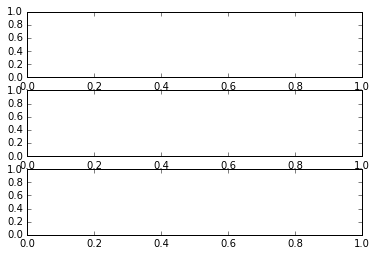

In [3]:
#Plotting Section
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(3)
#f(figsize=(12,8), dpi=200)
ax[0].plot(range(0,end),avg_clust, label = "Avg Clust")
ax[0].plot(range(0,end),avg_clust_weights, label = "Avg Clust Weights")
ax[0].legend()

ax[1].plot(range(0,end),assortativity_graph,label = "Assort")
ax[1].plot(range(0,end),assortativity_graph_weights,label = "Assort Weights")
plt.xlabel("Time(secs)")
plt.ylabel("Avg Assortativity")
ax[1].legend()

ax[2].plot(range(0,end),estrada_index,label = "Estrada Index")
plt.xlabel("Time(secs)")
plt.ylabel("Estrada Index")
ax[2].legend()

In [4]:
fig = plt.figure(figsize=(15,8), dpi=200)
x= range(len(G.nodes()))
plt.xticks(x,sorted(G.nodes()),size=6)
plt.imshow(current_cent,aspect=0.1)
#savefig("current.svg",format="svg")
plt.show()

NameError: name 'G' is not defined

ValueError: x and y must have same first dimension

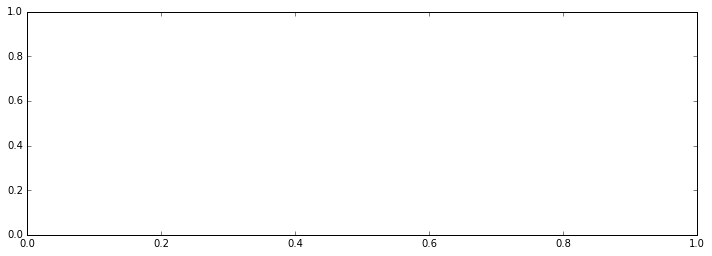

In [5]:
fig = plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(0,end),estrada_index)
plt.xlabel("Time(secs)",size=24)
plt.ylabel("Estrada Index",size=24)
plt.fill_between(range(0,end),estrada_index,y2=0)

2.9886243485e+11
2.98858130897e+11
2.98750779536e+11
2.98750778909e+11
2.98750775411e+11
2.98750774272e+11
2.9875077374e+11
2.98750766385e+11
2.98750761151e+11
1.35339216741e+11
83430754476.2
45390956333.2
28842961629.0
26508771543.6
11558209219.0
10536486531.2
9916071906.86
9892470328.44
3794272391.44
1592236090.62


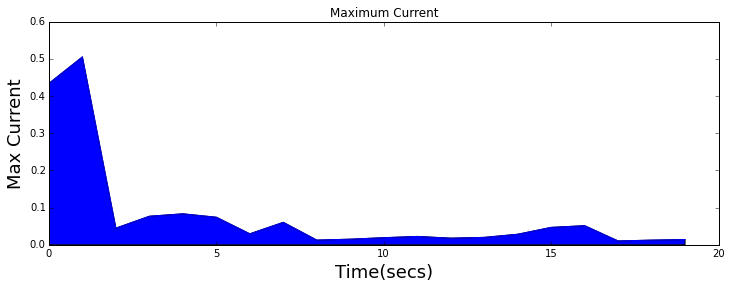

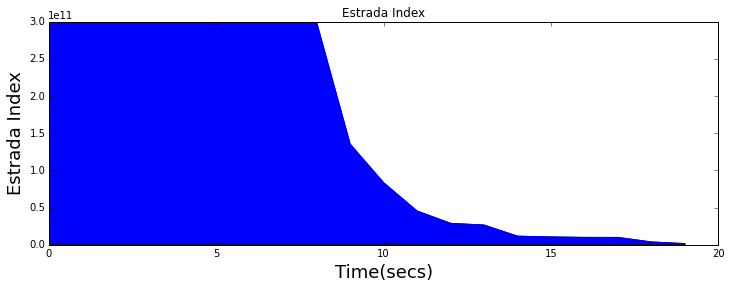

In [33]:
# Attack a network based on current flow 
#Read in a network
G = nx.read_graphml("scenarios/JavaScenario/output_fadingModelRedo/JavaScenarioprocessed00590.graphml")
G = add_weights_rf(G,threshold=0.8)
G.to_undirected()

import operator
est_array = []
max_curr = []
#get estrada index
for i in range(20):
    print nx.estrada_index(G)
    est_array.append(nx.estrada_index(G))
    curr_dict = nx.betweenness_centrality(G, normalized=True, weight='linkLossRate')
#    print max(curr_dict.values())
    max_curr.append(max(curr_dict.values()))
    
    nodemax= max(curr_dict.iteritems(), key=operator.itemgetter(1))[0]
#    print "removing ", nodemax
    G.remove_node(nodemax)
fig = plt.figure(figsize=(12,4), dpi=200)
plt.title('Maximum Current')
plt.plot(range(0,len(max_curr)),max_curr)
plt.ylabel("Max Current",size=18)
plt.fill_between(range(0,len(max_curr)),max_curr,y2=0)
plt.xlabel("Time(secs)",size=18)
plt.show()
fig = plt.figure(figsize=(12,4), dpi=200)
plt.title('Estrada Index')
plt.plot(range(0,len(est_array)),est_array)
plt.ylabel("Estrada Index",size=18)
plt.xlabel("Time(secs)",size=18)
plt.fill_between(range(0,len(est_array)),est_array,y2=0)
plt.show()
    

